# Board Game Behavior: An Analysis of Demographics and Gameplay Preferences

## Documentation

[Initial Project Proposal](https://github.com/sevenwwu/sevenwwu.github.io/blob/main/write-ups/initial_project_proposal_revised.md) (11/8/23)

[Milestone One](https://github.com/sevenwwu/sevenwwu.github.io/tree/main/write-ups/milestone_one_delieverable) (11/18/23)

## Data Processing and Modeling

In [53]:
!python -m pip install pandas
!python -m pip install openpyxl
!python -m pip install seaborn
!python -m pip install scikit-learn

### Data Cleaning

In [54]:
import pandas as pd
import numpy as np

raw_df = pd.read_excel("datasets/rawdata.xlsx",keep_default_na=False)

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 22 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype         
---  ------                                                                                                                                               --------------  -----         
 0   ID                                                                                                                                                   244 non-null    int64         
 1   Start time                                                                                                                                           244 non-null    datetime64[ns]
 2   Completion time                                                                                                                                      2

##### Drop Metadata

In [55]:
dropped_df = raw_df.drop(columns=["ID","Start time","Completion time","Email","Name","Last modified time"])

dropped_df[:0]

,I am a:,What is your Gender Identity?,What is your Age?\n(this field may remain blank),What is your Race?,What is your current Employment Status?,Do you wear glasses or contact lenses for vision correction?,"What best describes your current religious or spiritual beliefs, if any?\n",What is your Area of Study or Major? \n(this field may remain blank)\n,"Do you enjoy playing board games, card games, or similar tabletop games?","How many board/card games do you own? \n(All non-roleplay table top games are included, i.e., chess, playing cards, Uno, Magic: The Gathering, etc.)",About how frequently do you play board/card games?,Select what best describes your engagement and style when it comes to board and card games?,I prefer games that include elements of:\n(select all that you prefer),"List up to 15 board/card games that you enjoy playing. \n(abide by the format: ""Game 1"", ""Game 2"", ""Game 3"")\n(this field may remain blank)\n","On a scale from 1 to 10, how much do you enjoy playing chess, with 1 being not enjoyable at all and 10 being extremely enjoyable?","Select your all genres of board/card games you enjoy.\n(if your preferred genre(s) is/are not listed, please list them in the ""other"" selection)"


#### Rename Raw Fields from Question to Concise Description

In [56]:
renamed_df = dropped_df.rename(columns={
    "I am a:": "WWUStatus",
    "What is your Gender Identity?": "Gender",
    "What is your Age?\n(this field may remain blank)": "Age",
    "What is your Race?": "Race(s)",
    "What is your current Employment Status?": "EmploymentStatus",
    "Do you wear glasses or contact lenses for vision correction?": "Vision",
    "What best describes your current religious or spiritual beliefs, if any?\n": "Religiosity",
    "What is your Area of Study or Major? \n(this field may remain blank)\n": "AOS",
    "Do you enjoy playing board games, card games, or similar tabletop games?": "EnjoysBoardGames",
    "How many board/card games do you own? \n(All non-roleplay table top games are included, i.e., chess, playing cards, Uno, Magic: The Gathering, etc.)": "BoardGamesOwned",
    "About how frequently do you play board/card games?": "FrequencyOfPlay",
    "Select what best describes your engagement and style when it comes to board and card games? ": "Style",
    "I prefer games that include elements of:\n(select all that you prefer)": "PreferredElements",
    "List up to 15 board/card games that you enjoy playing. \n(abide by the format: \"Game 1\", \"Game 2\", \"Game 3\")\n(this field may remain blank)\n": "EnjoyedBoardGames",
    "On a scale from 1 to 10, how much do you enjoy playing chess, with 1 being not enjoyable at all and 10 being extremely enjoyable?": "ChessRating",
    "Select your all genres of board/card games you enjoy.\n(if your preferred genre(s) is/are not listed, please list them in the \"other\" selection)": "EnjoyedGenres"
})

renamed_df[:0]


,WWUStatus,Gender,Age,Race(s),EmploymentStatus,Vision,Religiosity,AOS,EnjoysBoardGames,BoardGamesOwned,FrequencyOfPlay,Style,PreferredElements,EnjoyedBoardGames,ChessRating,EnjoyedGenres


#### Multiselect Binary/Boolean Features

##### Race(s)

In [57]:
renamed_df["Race(s)"].value_counts()

Race(s)
White;                                           185
Asian;                                            14
Hispanic or Latino;                                9
White;Asian;                                       6
White;Hispanic or Latino;                          5
Black or African American;White;                   4
White;Black or African American;                   3
White;Native Hawaiian or Pacific Islander;         2
Black or African American;                         2
Asian;Hispanic or Latino;                          2
Black or African American;White;Asian;             1
Black or African American;Hispanic or Latino;      1
White;Native American or American Indian;          1
Multiracial;                                       1
Mixed ethnicity;                                   1
Native American or American Indian;                1
Asian;Filipino;                                    1
Hispanic or Latino;White;                          1
Asian;White;                          

In [58]:
raceClean_df = renamed_df.copy()

unique_races = set()
for elements in raceClean_df["Race(s)"].dropna():
    unique_races.update(elements.split(";"))

unique_races = list(unique_races)
unique_races.sort()

In [59]:
# Create a new column for each unique element with binary values (0 or 1 or None)
for element in unique_races:
    raceClean_df[(element + "IsRace").replace(" ", "")] = raceClean_df["Race(s)"].apply(
        lambda x: int(element in x) if pd.notna(x) else None
    )

raceClean_df = raceClean_df.drop(columns={"Race(s)","IsRace"})

##### PreferredElements

In [60]:
raceClean_df["PreferredElements"].value_counts()

PreferredElements
Conflict/Competition;Strategy;                                                                                                                 7
Cooperation;Conflict/Competition;Luck;Strategy;Social Deduction/Hidden Role;Heavy/Immersive Theming;Puzzle-Solving;Trivia;Party/Low-Stakes;    6
Party/Low-Stakes;                                                                                                                              4
Conflict/Competition;Strategy;Trivia;                                                                                                          4
Cooperation;Conflict/Competition;Luck;Strategy;Puzzle-Solving;Party/Low-Stakes;                                                                3
                                                                                                                                              ..
Cooperation;Conflict/Competition;Strategy;Luck;                                                                 

In [61]:
preferredElementsClean_df = raceClean_df.copy()

unique_preferred_elements = set()
for elements in preferredElementsClean_df["PreferredElements"].dropna():
    unique_preferred_elements.update(elements.split(";"))
unique_preferred_elements

unique_preferred_elements = list(unique_preferred_elements)
unique_preferred_elements.sort()

In [62]:
# Create a new column for each unique element with binary values (0 or 1 or None)
for element in unique_preferred_elements:
    preferredElementsClean_df[(element + "IsPreferredElement").replace(" ", "")] = preferredElementsClean_df["PreferredElements"].apply(
        lambda x: int(element in x) if pd.notna(x) else None
    )

preferredElementsClean_df = preferredElementsClean_df.drop(columns={"PreferredElements","IsPreferredElement"})

##### EnjoyedGenres

In [63]:
enjoyedGenresClean_df = preferredElementsClean_df.copy()

unique_enjoyed_genres = set()
for elements in enjoyedGenresClean_df["EnjoyedGenres"].dropna():
    unique_enjoyed_genres.update(elements.split(";"))
unique_enjoyed_genres

unique_enjoyed_genres = list(unique_enjoyed_genres)
unique_enjoyed_genres.sort()

In [64]:
# Create a new column for each unique element with binary values (0 or 1 or None)
for element in unique_enjoyed_genres:
    enjoyedGenresClean_df[(element + "IsEnjoyedGenre").replace(" ", "")] = enjoyedGenresClean_df["EnjoyedGenres"].apply(
        lambda x: int(element in x) if pd.notna(x) else None
    )

enjoyedGenresClean_df = enjoyedGenresClean_df.drop(columns={"EnjoyedGenres","IsEnjoyedGenre"})

In [65]:
enjoyedGenresClean_df.columns.tolist()

['WWUStatus',
 'Gender',
 'Age',
 'EmploymentStatus',
 'Vision',
 'Religiosity',
 'AOS',
 'EnjoysBoardGames',
 'BoardGamesOwned',
 'FrequencyOfPlay',
 'Style',
 'EnjoyedBoardGames',
 'ChessRating',
 'AsianIsRace',
 'BlackorAfricanAmericanIsRace',
 'FilipinoIsRace',
 'HispanicorLatinoIsRace',
 'MixedethnicityIsRace',
 'MultiracialIsRace',
 'NativeAmericanorAmericanIndianIsRace',
 'NativeHawaiianorPacificIslanderIsRace',
 'PrefernottosayIsRace',
 'WhiteIsRace',
 'Conflict/CompetitionIsPreferredElement',
 'CooperationIsPreferredElement',
 'Heavy/ImmersiveThemingIsPreferredElement',
 'LuckIsPreferredElement',
 'Party/Low-StakesIsPreferredElement',
 'Puzzle-SolvingIsPreferredElement',
 'SocialDeduction/HiddenRoleIsPreferredElement',
 'StrategyIsPreferredElement',
 'TriviaIsPreferredElement',
 'AbstractStrategyIsEnjoyedGenre',
 'AdventureIsEnjoyedGenre',
 'AnimalsIsEnjoyedGenre',
 'AuctionIsEnjoyedGenre',
 'CardIsEnjoyedGenre',
 'CardDraftingIsEnjoyedGenre',
 'CivilizationIsEnjoyedGenre',
 '

In [66]:
reformatColumns_df = enjoyedGenresClean_df.rename(columns=lambda x: x.replace("\xa0", ""))

reformatColumns_df.columns.tolist()

['WWUStatus',
 'Gender',
 'Age',
 'EmploymentStatus',
 'Vision',
 'Religiosity',
 'AOS',
 'EnjoysBoardGames',
 'BoardGamesOwned',
 'FrequencyOfPlay',
 'Style',
 'EnjoyedBoardGames',
 'ChessRating',
 'AsianIsRace',
 'BlackorAfricanAmericanIsRace',
 'FilipinoIsRace',
 'HispanicorLatinoIsRace',
 'MixedethnicityIsRace',
 'MultiracialIsRace',
 'NativeAmericanorAmericanIndianIsRace',
 'NativeHawaiianorPacificIslanderIsRace',
 'PrefernottosayIsRace',
 'WhiteIsRace',
 'Conflict/CompetitionIsPreferredElement',
 'CooperationIsPreferredElement',
 'Heavy/ImmersiveThemingIsPreferredElement',
 'LuckIsPreferredElement',
 'Party/Low-StakesIsPreferredElement',
 'Puzzle-SolvingIsPreferredElement',
 'SocialDeduction/HiddenRoleIsPreferredElement',
 'StrategyIsPreferredElement',
 'TriviaIsPreferredElement',
 'AbstractStrategyIsEnjoyedGenre',
 'AdventureIsEnjoyedGenre',
 'AnimalsIsEnjoyedGenre',
 'AuctionIsEnjoyedGenre',
 'CardIsEnjoyedGenre',
 'CardDraftingIsEnjoyedGenre',
 'CivilizationIsEnjoyedGenre',
 '

#### AOS (manual string bucketing)

In [67]:
aos_df = reformatColumns_df
aos_df["AOS"].str.lower().unique()

array(['computer science ', 'data science ', 'data science', 'eece',
       'electrical and computer engineering ', 'statistics',
       'environmental studies', 'applied mathematics', 'chemistry', 'rml',
       'political science', 'elementary education', 'english',
       'music education', 'n/a', 'art', 'psychology', '',
       'psych (probably)', 'music', 'environmental science - toxicology',
       'history/museum studies', 'elementary ed',
       'environmental science ', 'mathematics ', 'business', 'biochem ',
       'vocal performance ', 'secondary education ', 'business ',
       'linguistics', 'history', 'bio/anth', 'mathematics',
       'marine biology ', 'environmental science',
       'communication disorders', 'engineering ', 'biochem',
       'kinesiology', 'economics and mathematics',
       'music education and german', 'art p-12',
       'chemistry either organic or inorganic', 'math',
       'electrical engineering',
       'undecided but leaning towards engineering'

In [68]:
manual_mapping_aos = {
    "computer science": "STEM",
    "data science": "STEM",
    "eece": "STEM",
    "electrical and computer engineering": "STEM",
    "statistics": "STEM",
    "environmental studies": "STEM",
    "applied mathematics": "STEM",
    "chemistry": "STEM",
    "rml": "Other",
    "political science": "Social Studies",
    "elementary education": "Education",
    "english": "Arts & Humanities",
    "music education": "Arts & Humanities",
    "nan": "Other",
    "art": "Arts & Humanities",
    "psychology": "Social Studies",
    "psych (probably)": "Social Studies",
    "music": "Arts & Humanities",
    "environmental science - toxicology": "STEM",
    "history/museum studies": "Arts & Humanities",
    "elementary ed": "Education",
    "environmental science": "STEM",
    "mathematics": "STEM",
    "business": "Business",
    "biochem": "STEM",
    "vocal performance": "Arts & Humanities",
    "secondary education": "Education",
    "linguistics": "Arts & Humanities",
    "history": "Arts & Humanities",
    "bio/anth": "STEM",
    "marine biology": "STEM",
    "communication disorders": "Health & Medicine",
    "engineering": "STEM",
    "kinesiology": "Health & Medicine",
    "economics and mathematics": "STEM",
    "music education and german": "Arts & Humanities",
    "art p-12": "Arts & Humanities",
    "chemistry either organic or inorganic": "STEM",
    "math": "STEM",
    "electrical engineering": "STEM",
    "undecided but leaning towards engineering": "Unknown",  # Assuming lean towards STEM, but no exact match
    "medicine": "Health & Medicine",
    "rec management": "Other",  # Assuming Recreation Management
    "economics": "Social Studies",  # Close to "economics and mathematics", but economics is often considered Social Studies
    "geology": "STEM",
    "geology (paleoclimate)": "STEM",
    "visual journalism": "Arts & Humanities",
    "biology/math": "STEM",  # Combination of two STEM fields
    "behavioral neuroscience": "STEM",  # Close to "psychology" which is Social Studies, but has a heavy STEM component
    "marine biology and theater production": "STEM",  # Marine biology is STEM, theater production could be Arts, but STEM is the primary
    "anthropology": "Social Studies",
    "biology": "STEM",
    "management information systems": "Business",
    "marine bio": "STEM",
    "history/holocaust & genocide studies": "Arts & Humanities",
    "sped & eled": "Education",  # Assuming this refers to special education & elementary education
    "anthropology, communication studies": "Social Studies",
    "theatre": "Arts & Humanities",
    "studio art": "Arts & Humanities",
    "urban planning and sustainable development": "Other",  # Not a clear category, could be Social Studies or another category
    "art and design": "Arts & Humanities",
    "spanish": "Arts & Humanities",  # Language studies are often classified here
    "biochemistry": "STEM",
    "art studio": "Arts & Humanities",
    "art ed": "Arts & Humanities",
    "comm": "Other",  # Assuming "communication", but not explicitly listed, could fit Social Studies or Business,
    
    "environmental studies: eco-social justice and education emphasis": "STEM",  # Falls under Environmental Studies
    "communications": "Other",  # Often classified as Arts & Humanities
    "theatre/education": "Education",  # Falls under Education
    "undecided": "Unknown",  # Assuming still undecided as before
    "marketing": "Business",  # Falls under Business
    "communication studies": "Arts & Humanities",  # Often classified as Arts & Humanities
    "sociology": "Social Studies",  # Social Studies
    "education and public relations": "Education",  # Falls under Education
    "pre nursing": "Health & Medicine",  # Falls under Health & Medicine
    "economics/mathematics": "STEM",  # Combination of Economics and Mathematics - falls under STEM
    "mathematics secondary education": "Education",  # Falls under Education
    "dance": "Arts & Humanities",  # Often classified as Arts & Humanities
    "art studio (ba), art history": "Arts & Humanities",  # Falls under Arts & Humanities
    "narrative and folklore studies (fairhaven major)": "Arts & Humanities",  # Falls under Arts & Humanities
    "pre med and psychology": "Health & Medicine",  # Falls under Health & Medicine
    "archaeology": "Social Studies",  # Falls under Social Studies
    "neuroscience": "STEM",  # Falls under STEM
    "english literature with a teaching emphasis": "Arts & Humanities",  # Falls under Arts & Humanities
    "marine science": "STEM",  # Falls under STEM
    "fairhaven": "Other",  # Falls under Other
    "international business": "Business",  # Falls under Business
    "music composition": "Arts & Humanities",  # Falls under Arts & Humanities
    "creative writing": "Arts & Humanities",  # Falls under Arts & Humanities
    "business and sustainability": "Business",  # Falls under Business
    "early childhood education": "Education",  # Falls under Education
    "graphic design": "Arts & Humanities",  # Falls under Arts & Humanities
    "education": "Education",  # Falls under Education
    "stem": "STEM",  # Falls under STEM
    "envs": "STEM",  # Falls under STEM

    
    "behavioural neuroscience": "STEM",
    "english lit": "Arts & Humanities",
    "food equity and sustainable agriculture": "Other",  # Could be Social Studies, Business, or even STEM, unclear
    "art history and museum studies": "Arts & Humanities",
    "japanese language": "Arts & Humanities",
    "graphic design and marketing": "Arts & Humanities",  # Graphic Design is often in Arts & Humanities, Marketing is Business, but first seems primary
    "music performance major": "Arts & Humanities",
    "environment studies": "STEM",
    "business or elementary education": "Unknown",  # Could be either Business or Education 
    "marine and coastal science": "STEM",
    "undeclared, strongly thinking about history": "Unknown",  # Assuming lean towards Arts & Humanities, but no exact match
    "public health": "Health & Medicine",
    "energy policy and management": "Other",  # Could be Business, Social Studies, or STEM
    "undeclared": "Unknown",
    "fine arts": "Arts & Humanities",
    "english, history of culture": "Arts & Humanities",
    "psychology and elementary education": "Education",  # Both Psychology and Elementary Education could be Education
    "communication science and disordwrs": "Health & Medicine",
    "anthropology/history": "Social Studies",
    "special education and elementary education": "Education",
    "ibus": "Business",  # Assuming International Business
    "energy science": "STEM",
    "politics/philosophy/economics": "Social Studies",  # Combination of three Social Studies fields
    "history/social studies": "Social Studies",
    "energy": "STEM"  # Energy could be a part of STEM disciplines like Physics or Environmental Sciences
}


noncategorized_data = []

def categorize_aos_string(aos):
    if pd.isnull(aos) or aos == "n/a" or aos == "" or aos == "N/A":
        return "Unknown"  # For handling NaN values
    field_clean = aos.lower().rstrip()
    for key, category in manual_mapping_aos.items():
        if key == field_clean:
            return category
    noncategorized_data.append(field_clean)    


aos_df["AOSCat"] = aos_df["AOS"].apply(categorize_aos_string)

if (len(noncategorized_data) > 0):
    raise ValueError(f"Unknown categories: {noncategorized_data}") 

aos_df["AOSCat"].unique()

array(['STEM', 'Other', 'Social Studies', 'Education',
       'Arts & Humanities', 'Unknown', 'Business', 'Health & Medicine'],
      dtype=object)

#### Shorting the Length of Single Select Answer Choices for "Style"

In [69]:
style_df = aos_df 

style_df["Style"].unique()

array(['Not interested in playing board/card games.',
       'Party-only player, primarily playing board/card games at social gatherings or parties.',
       'Strategy-focused player, enjoying games that require planning and tactics, but also participates in more casual games.',
       'Situation-Specific Player, adapts style and enthusiasm based on the specific game or social context. May be casual in some situations and highly strategic in others, depending on the game being played.',
       'None of these describe me.',
       'Casual player, participating for fun and relaxation, without a strong focus on winning. Still willing to engage with complex games.',
       'Simple and straightforward player, preferring uncomplicated games with easy rules.'],
      dtype=object)

In [70]:
player_styles_mapping = {
    "Strategy-focused player, enjoying games that require planning and tactics, but also participates in more casual games.": "Strategic",
    "Situation-Specific Player, adapts style and enthusiasm based on the specific game or social context. May be casual in some situations and highly strategic in others, depending on the game being played.": "Situation-Specific",
    "Casual player, participating for fun and relaxation, without a strong focus on winning. Still willing to engage with complex games.": "Casual",
    "Simple and straightforward player, preferring uncomplicated games with easy rules.": "Simple",
    "Party-only player, primarily playing board/card games at social gatherings or parties.": "Party/Social",
    "Not interested in playing board/card games.": "Not Interested",
    "Never played or never had the opportunity to play board/card games.": "Never Played",
    "None of these describe me.": "Other",
    "Prefer not to say": "Prefer not to say"
}

def map_player_styles(string):
    for key, val in player_styles_mapping.items():
        if key in string:
            return val
    raise ValueError(f"Unknown category: {string}") 

new_style_df = style_df.copy()

new_style_df["Style"] = style_df["Style"].apply(map_player_styles)

new_style_df["Style"].unique()

array(['Not Interested', 'Party/Social', 'Strategic',
       'Situation-Specific', 'Other', 'Casual', 'Simple'], dtype=object)

#### Assigning Order to Particular Catagories

In [71]:
cat_order_df = new_style_df.copy()

cat_order_df["BoardGamesOwned"] = cat_order_df["BoardGamesOwned"].apply(lambda x: "0" if x == "I do not own any board/card games.\xa0" else x)

cat_order_df["BoardGamesOwned"] = pd.Categorical(cat_order_df["BoardGamesOwned"],
    categories=["Prefer not to say","0", "1 or 2", "2 to 5", "5 to 10", "10 to 20", "More than 20"],ordered=True)


cat_order_df["FrequencyOfPlay"] = pd.Categorical(cat_order_df["FrequencyOfPlay"],
    categories=["Daily","Several times a week","Weekly","Several times a month","Monthly","Every few months","Rarely/Seldom","Never","Prefer not to say"],ordered=True)


cat_order_df["ChessRating"] = cat_order_df["ChessRating"].apply(lambda x: "Unknown" if x == "" else x)

cat_order_df["ChessRating"] = pd.Categorical(cat_order_df["ChessRating"].astype(str),
    categories=["Unknown","1","2","3","4","5","6","7","8","9","10"], ordered=True)


#### Convert Features to Int

In [72]:
convert_df = cat_order_df.copy()
convert_df["Age"] = convert_df["Age"].apply(lambda x: -1 if x == "" else x)
convert_df["Age"] = convert_df["Age"].astype(int)

In [73]:
cleaned_df = convert_df

cleaned_df.to_csv("datasets/cleaned.csv")

### Exploratory Data Analysis

#### Defining Functions for Analyzing Categorical Data

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Intended for single-select/categorical feature comparison
# `x` should be a Panda Series
# `y` should be a Panda Series
def plot_count_and_percentage_heatmaps(x, y):
    data = pd.DataFrame({x.name: x, y.name: y})

    count_matrix = pd.crosstab(data[x.name], data[y.name])
    
    percent_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0) * 100

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Heatmap for counts
    sns.heatmap(count_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True, ax=ax[0])
    ax[0].set_title("Count Matrix of Categories")
    ax[0].set_xlabel(y.name)
    ax[0].set_ylabel(x.name)

    # Heatmap for percentages
    sns.heatmap(percent_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, ax=ax[1],vmin=0.0, vmax=100.0)
    ax[1].set_title("Percentage Matrix of Categories")
    ax[1].set_xlabel(y.name)
    ax[1].set_ylabel(x.name)

    plt.tight_layout()
    plt.show()

# Intended for categorical feature comparison against several bool fields
# `data` should be a Pandas Data Frame
# `x` should be a string that refers to the categorical feature in `data`
# `y` should be an array of strings that refer to the several bool features in `data`
def plot_heatmap_of_bool_features_percent(data, x, y):
    df_melted = data.melt(id_vars=x, value_vars=y, var_name="Bool", value_name="True")

    df_pivot = df_melted.groupby([x,"Bool"]).sum().reset_index().pivot(index=x, columns="Bool", values="True")

    total = data[x].value_counts()

    df_pivot = df_pivot.join(total)
    

    df_pivot.loc[:, df_pivot.columns != "count"] = ((df_pivot.loc[:, df_pivot.columns != "count"].div(df_pivot["count"], axis=0)) * 100).round(4)
    
    print(df_pivot["count"])
    df_pivot = df_pivot.drop(columns=["count"])
    
    df_pivot = df_pivot.transpose()

    sns.heatmap(df_pivot, annot=True, cmap="Blues", fmt=".2f",vmin=0.0, vmax=100.0)

# Intended for categorical feature comparison against several bool fields
# `data` should be a Pandas Data Frame
# `x` should be a string that refers to the categorical feature in `data`
# `y` should be an array of strings that refer to the several bool features in `data`
def plot_heatmap_of_bool_features_val_count(data, x, y):
    df_melted = data.melt(id_vars=x, value_vars=y, var_name="Bool", value_name="True")

    df_pivot = df_melted.groupby([x,"Bool"]).sum().reset_index().pivot(index=x, columns="Bool", values="True")

    total = data[x].value_counts()

    df_pivot = df_pivot.join(total)
    
    df_pivot.rename(columns={"count": "UniqueMembersOfParticular" + x}, inplace=True)
    
    df_pivot = df_pivot.transpose()
    # Plot
    sns.heatmap(df_pivot, annot=True, cmap="Blues", fmt=".2f")

# Used to reduce the number of categories in a feature by setting the value to "Other" for insufficient response quantity of specific catagories
# `df` should be a Pandas Data Frame
# `col_name` should be the string name of the column/feature you'd like to filter
# `threshold` should be the minimum count needed to maintain the categorical variable 

# For example, if `Age` gets a bunch of responses between 18 and 24, and you get a few 40s and one 60. You can use this function to reduce the 
# different categorical variables to simply 18 through 24 and "Other"
def filter_threshold(df, col_name, threshold):
    df_copy = df.copy() 
    counts = df_copy[col_name].value_counts()
    df_copy.loc[df_copy[col_name].isin(counts[counts < threshold].index), col_name] = "Other"
    return df_copy

#### Distribution of Features

The following code is used to filter out feature responses that are underrepresented or minimal in survey data, thus preventing inaccurate conclusions that could arise from only looking at a small sample of a population. Most of features graphed below have at least two prominent catagories for which to perform data analysis, which is sufficient. This includes:

- Gender
- Age (within the range of 18 to 24)
- Employment Status (at least for Part-Time and Unemployed)
- Vision
- Area of Study Catagories
- Number of Board Games Owned
- Frequency of Play
- Style
- Chess Rating

However, a few fields did not get sufficient diverse responses to conclude anything, this includes:
- WWU Status
  - Nearly everyone who took this survey was a student
- Religiosity
  - Most people who filled out this survey were secular, and the largest minority religious group is simply too small to make any meaningful conclusions
- Does person enjoys board games
  - The overwhelming majority of people who filled out this survey liked playing board games making relationships between demographics hard to draw

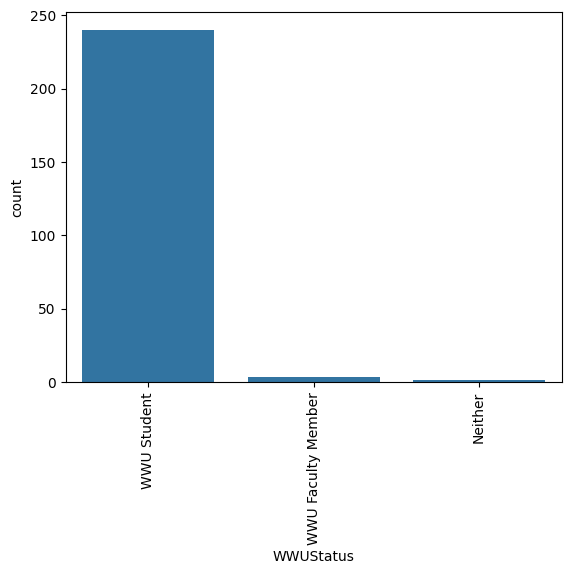

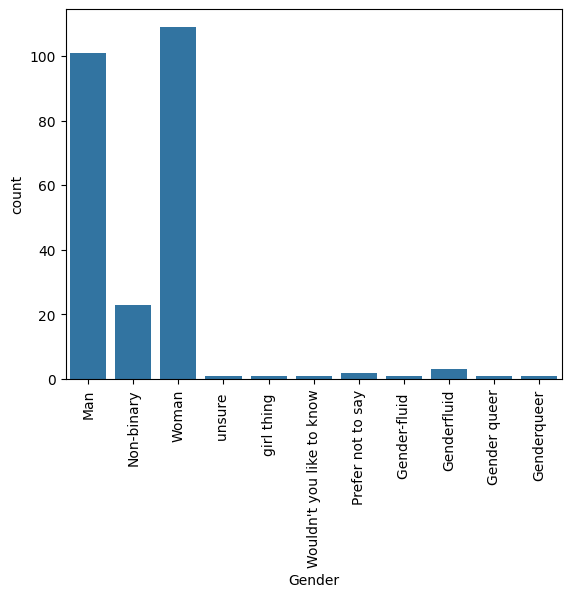

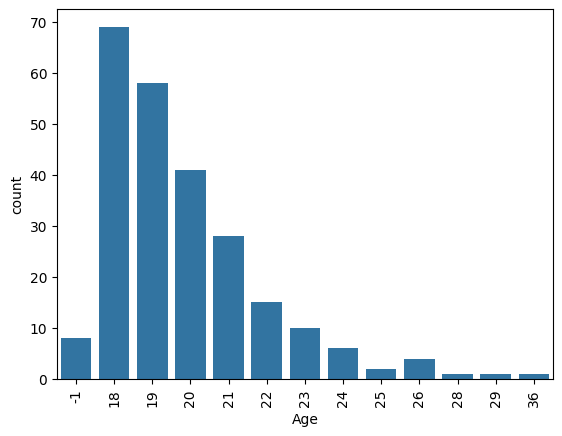

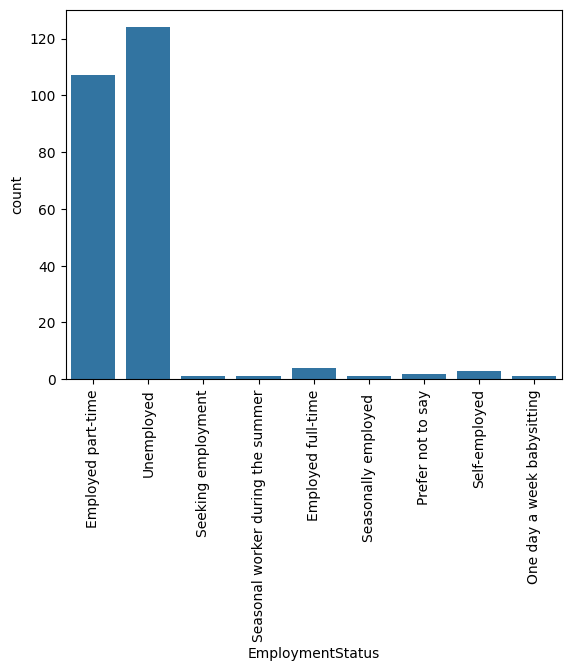

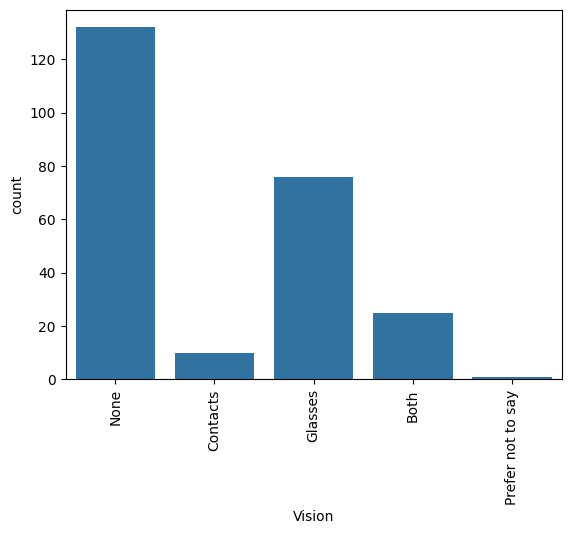

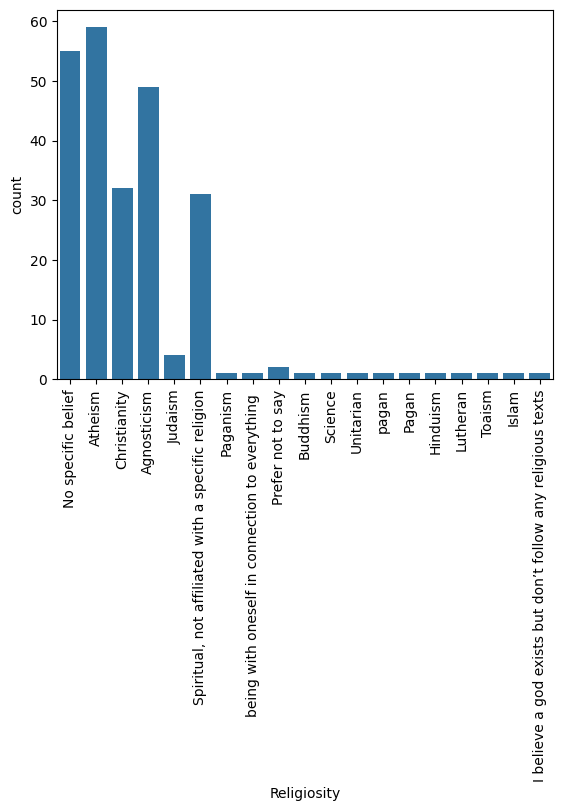

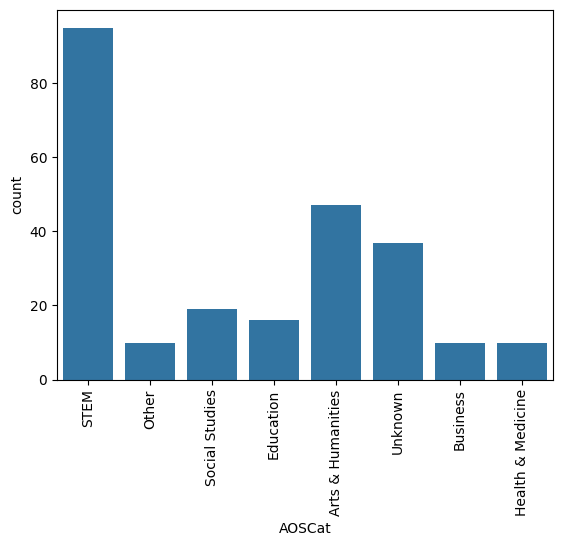

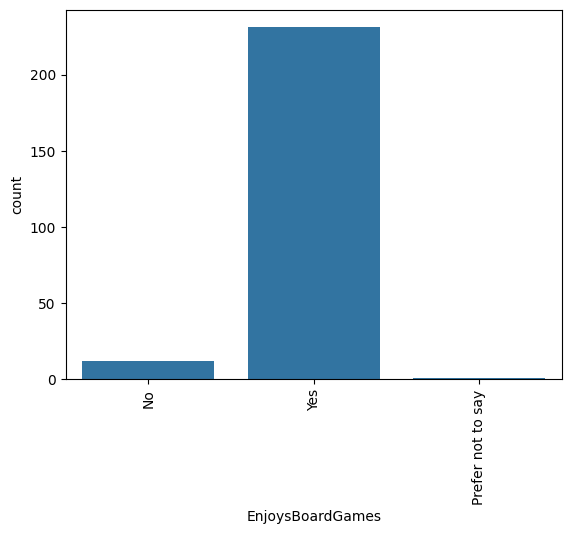

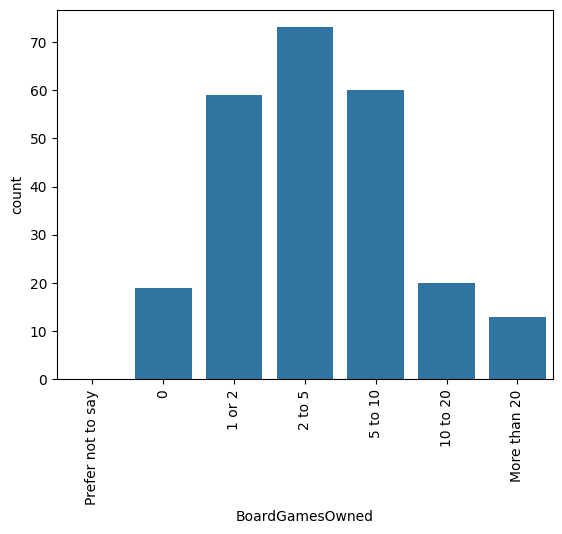

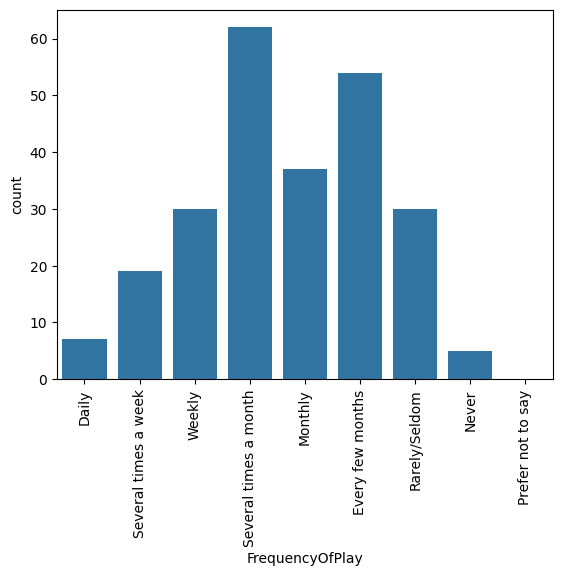

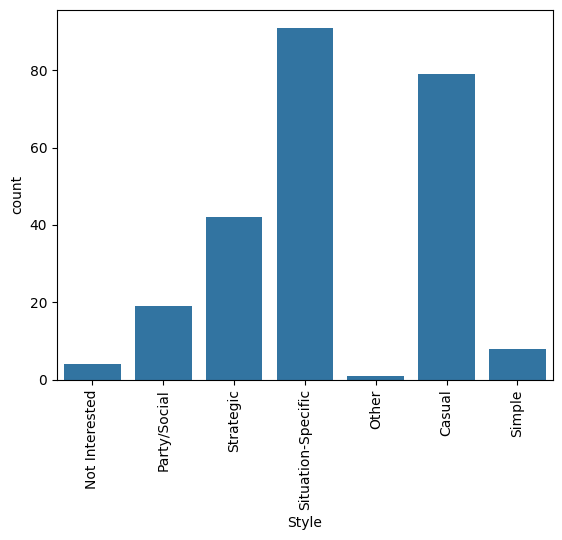

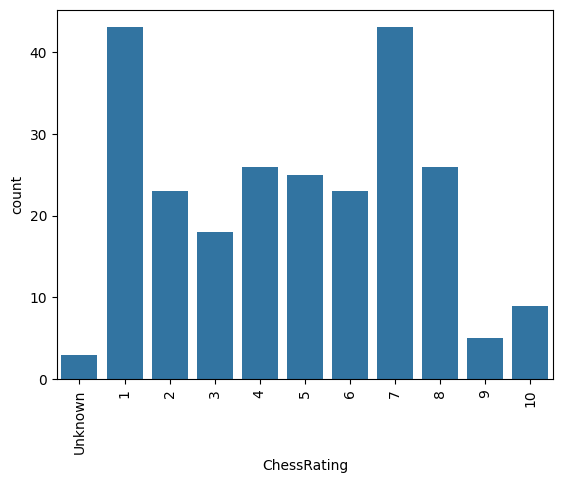

In [75]:
features = ['WWUStatus', 'Gender', 'Age', 'EmploymentStatus', 'Vision',
       'Religiosity', 'AOSCat', 'EnjoysBoardGames', 'BoardGamesOwned',
       'FrequencyOfPlay', 'Style', 'ChessRating',]

for feature in features:
    sns.countplot(x=feature, data=cleaned_df)
    plt.xticks(rotation=90) 
    plt.show()

#### Distribution of Features (cont'd)

The following questions were multi-select and resulted in bool fields. Because of this, we need to display the data slightly differently: totalling all "True"/selected values from the related features.

The multi-select questions were in regard to Race, Preferred Gameplay Elements, and Enjoyed Genres.

Preferred Gameplay Elements and Enjoyed Genres got a sufficient distribution of responses, however, Race did not receive sufficiently diverse responses for analysis.

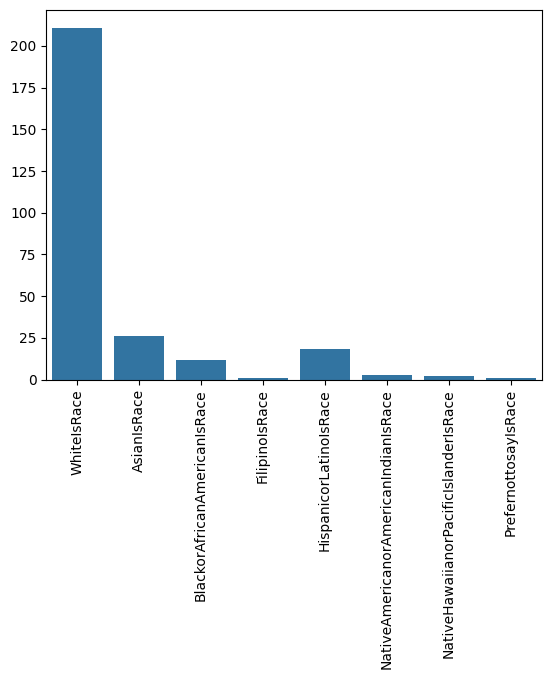

In [76]:
bool_columns = ['WhiteIsRace','AsianIsRace', 'BlackorAfricanAmericanIsRace', 'FilipinoIsRace',
       'HispanicorLatinoIsRace', 'NativeAmericanorAmericanIndianIsRace',
       'NativeHawaiianorPacificIslanderIsRace', 'PrefernottosayIsRace',]

true_counts = {}

for col in bool_columns:
    true_counts[col] = cleaned_df[cleaned_df[col] == 1].shape[0]

true_counts_series = pd.Series(true_counts)

sns.barplot(true_counts_series)
plt.xticks(rotation=90)
plt.show()

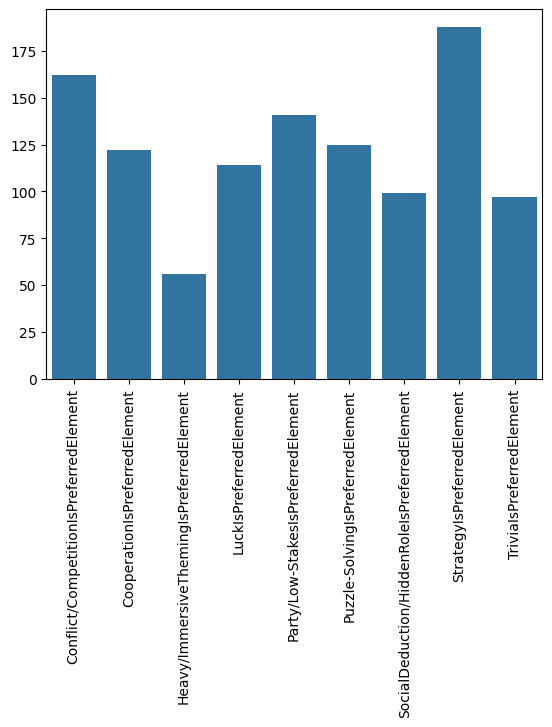

In [77]:
bool_columns = ['Conflict/CompetitionIsPreferredElement',
       'CooperationIsPreferredElement',
       'Heavy/ImmersiveThemingIsPreferredElement', 'LuckIsPreferredElement',
       'Party/Low-StakesIsPreferredElement',
       'Puzzle-SolvingIsPreferredElement',
       'SocialDeduction/HiddenRoleIsPreferredElement',
       'StrategyIsPreferredElement', 'TriviaIsPreferredElement',]

true_counts = {}

for col in bool_columns:
    true_counts[col] = cleaned_df[cleaned_df[col] == 1].shape[0]

true_counts_series = pd.Series(true_counts)

sns.barplot(true_counts_series)
plt.xticks(rotation=90)
plt.show()

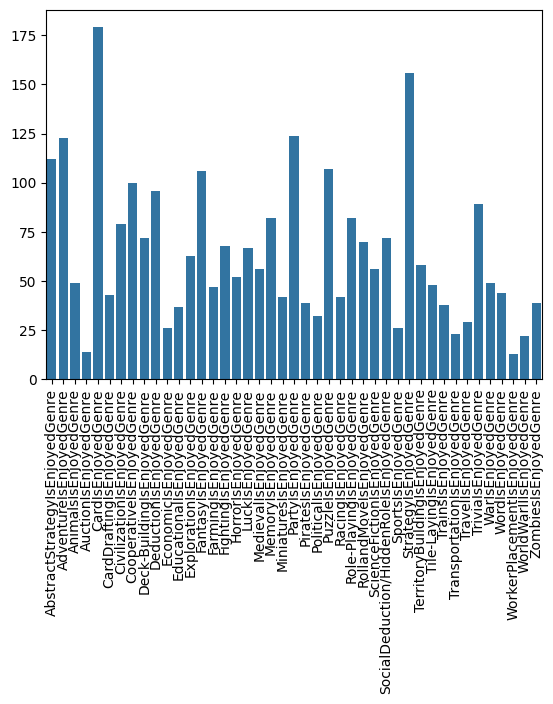

In [78]:
bool_columns = ['AbstractStrategyIsEnjoyedGenre', 'AdventureIsEnjoyedGenre',
       'AnimalsIsEnjoyedGenre', 'AuctionIsEnjoyedGenre', 'CardIsEnjoyedGenre',
       'CardDraftingIsEnjoyedGenre', 'CivilizationIsEnjoyedGenre',
       'CooperativeIsEnjoyedGenre', 'Deck-BuildingIsEnjoyedGenre',
       'DeductionIsEnjoyedGenre', 'EconomicIsEnjoyedGenre',
       'EducationalIsEnjoyedGenre', 'ExplorationIsEnjoyedGenre',
       'FantasyIsEnjoyedGenre', 'FarmingIsEnjoyedGenre',
       'FightingIsEnjoyedGenre', 'HorrorIsEnjoyedGenre', 'LuckIsEnjoyedGenre',
       'MedievalIsEnjoyedGenre', 'MemoryIsEnjoyedGenre',
       'MiniaturesIsEnjoyedGenre', 'PartyIsEnjoyedGenre',
       'PiratesIsEnjoyedGenre', 'PoliticalIsEnjoyedGenre',
       'PuzzleIsEnjoyedGenre', 'RacingIsEnjoyedGenre',
       'Role-PlayingIsEnjoyedGenre', 'RollandMoveIsEnjoyedGenre',
       'ScienceFictionIsEnjoyedGenre',
       'SocialDeduction/HiddenRoleIsEnjoyedGenre', 'SportsIsEnjoyedGenre',
       'StrategyIsEnjoyedGenre', 'TerritoryBuildingIsEnjoyedGenre',
       'Tile-LayingIsEnjoyedGenre', 'TrainsIsEnjoyedGenre',
       'TransportationIsEnjoyedGenre', 'TravelIsEnjoyedGenre',
       'TriviaIsEnjoyedGenre', 'WarIsEnjoyedGenre', 'WordIsEnjoyedGenre',
       'WorkerPlacementIsEnjoyedGenre', 'WorldWarIIIsEnjoyedGenre',
       'ZombiesIsEnjoyedGenre',]

true_counts = {}

for col in bool_columns:
    true_counts[col] = cleaned_df[cleaned_df[col] == 1].shape[0]

true_counts_series = pd.Series(true_counts)

sns.barplot(true_counts_series)
plt.xticks(rotation=90)
plt.show()



#### (Random) Exploratory Analysis

This section is dedicated to graphing random sufficient features against one another in hopes of uncovering hidden relationships.

In [106]:
# There were many different responses for various types of non-binary gender identities, because of this, graphing the data becomes a bit muddled
# This is solved by grouping the non-binary responses into an "Other" category
genderForAnalysis_df = filter_threshold(cleaned_df,"Gender",25)

`Gender` Against `ChessRating` Box Plot

There does appear to be a substantial difference in ratings between Men and Women within in the data.

In [107]:
genderForAnalysis_df["Gender"].value_counts()

Gender
Woman    109
Man      101
Other     34
Name: count, dtype: int64

(-0.5, 10.5)

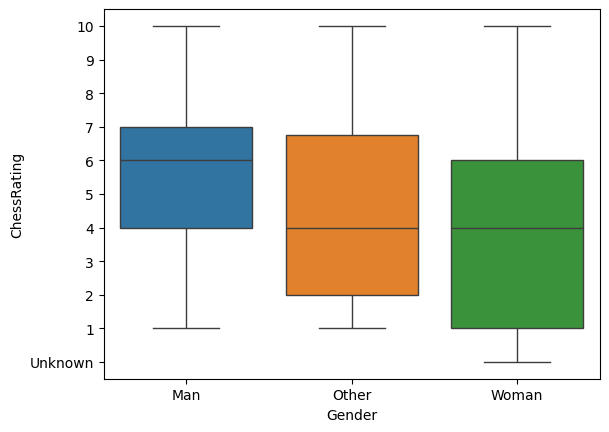

In [108]:
sns.boxplot(x=genderForAnalysis_df["Gender"],y=genderForAnalysis_df["ChessRating"],hue=genderForAnalysis_df["Gender"])
plt.ylim(reversed(plt.ylim()))

`Gender` Against `Style` Heat Map

All three groups seem to be reasonably

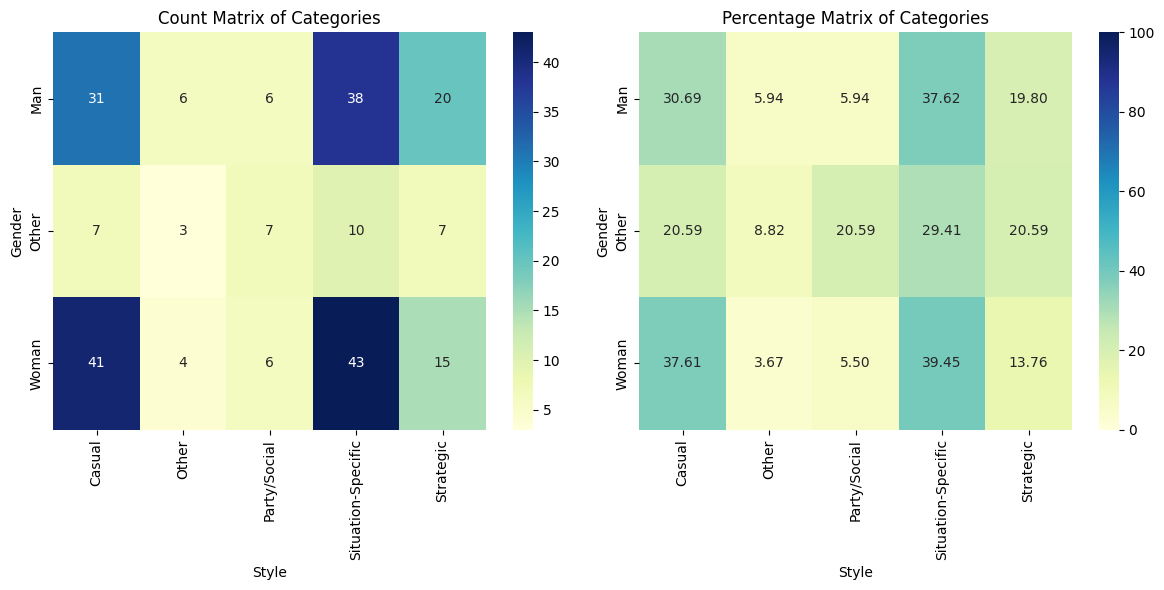

In [109]:
selected_rows = filter_threshold(genderForAnalysis_df, "Style", 15)
plot_count_and_percentage_heatmaps(selected_rows["Gender"],selected_rows["Style"],)

Gender
Man      101
Other     34
Woman    109
Name: count, dtype: int64


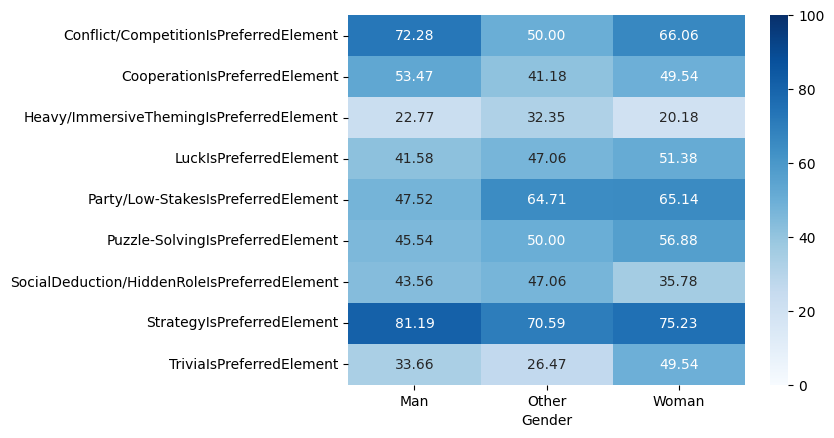

In [110]:
plot_heatmap_of_bool_features_percent(genderForAnalysis_df,"Gender",["Conflict/CompetitionIsPreferredElement","CooperationIsPreferredElement","Heavy/ImmersiveThemingIsPreferredElement","LuckIsPreferredElement",
     "Party/Low-StakesIsPreferredElement","Puzzle-SolvingIsPreferredElement","SocialDeduction/HiddenRoleIsPreferredElement","SocialDeduction/HiddenRoleIsPreferredElement",
     "StrategyIsPreferredElement","TriviaIsPreferredElement"])

Gender
Man      101
Other     34
Woman    109
Name: count, dtype: int64

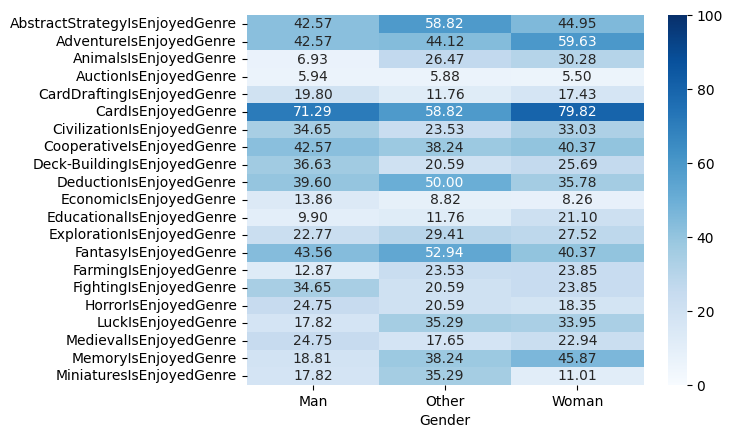

In [111]:
plot_heatmap_of_bool_features_percent(genderForAnalysis_df,"Gender",
    ['AbstractStrategyIsEnjoyedGenre', 'AdventureIsEnjoyedGenre',
       'AnimalsIsEnjoyedGenre', 'AuctionIsEnjoyedGenre', 'CardIsEnjoyedGenre',
       'CardDraftingIsEnjoyedGenre', 'CivilizationIsEnjoyedGenre',
       'CooperativeIsEnjoyedGenre', 'Deck-BuildingIsEnjoyedGenre',
       'DeductionIsEnjoyedGenre', 'EconomicIsEnjoyedGenre',
       'EducationalIsEnjoyedGenre', 'ExplorationIsEnjoyedGenre',
       'FantasyIsEnjoyedGenre', 'FarmingIsEnjoyedGenre',
       'FightingIsEnjoyedGenre', 'HorrorIsEnjoyedGenre', 'LuckIsEnjoyedGenre',
       'MedievalIsEnjoyedGenre', 'MemoryIsEnjoyedGenre',
       'MiniaturesIsEnjoyedGenre'])

Gender
Man      101
Other     34
Woman    109
Name: count, dtype: int64


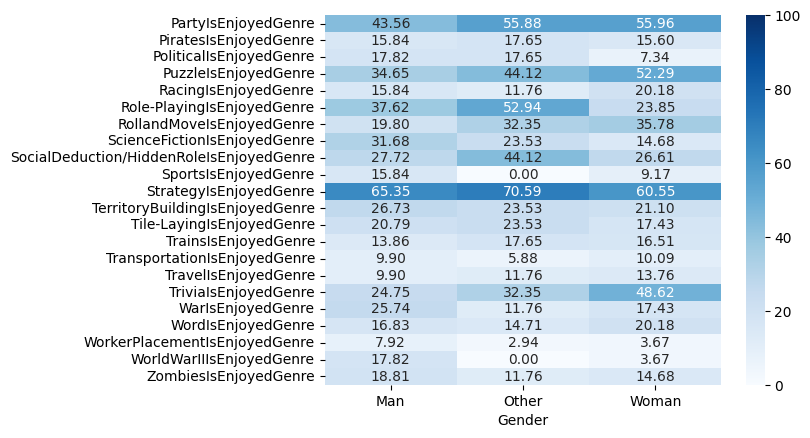

In [112]:
plot_heatmap_of_bool_features_percent(genderForAnalysis_df,"Gender",['PartyIsEnjoyedGenre',
       'PiratesIsEnjoyedGenre', 'PoliticalIsEnjoyedGenre',
       'PuzzleIsEnjoyedGenre', 'RacingIsEnjoyedGenre',
       'Role-PlayingIsEnjoyedGenre', 'RollandMoveIsEnjoyedGenre',
       'ScienceFictionIsEnjoyedGenre',
       'SocialDeduction/HiddenRoleIsEnjoyedGenre', 'SportsIsEnjoyedGenre',
       'StrategyIsEnjoyedGenre', 'TerritoryBuildingIsEnjoyedGenre',
       'Tile-LayingIsEnjoyedGenre', 'TrainsIsEnjoyedGenre',
       'TransportationIsEnjoyedGenre', 'TravelIsEnjoyedGenre',
       'TriviaIsEnjoyedGenre', 'WarIsEnjoyedGenre', 'WordIsEnjoyedGenre',
       'WorkerPlacementIsEnjoyedGenre', 'WorldWarIIIsEnjoyedGenre',
       'ZombiesIsEnjoyedGenre'])

AOSCat
Arts & Humanities    47
Business             10
Education            16
Health & Medicine    10
Other                10
STEM                 95
Social Studies       19
Unknown              37
Name: count, dtype: int64


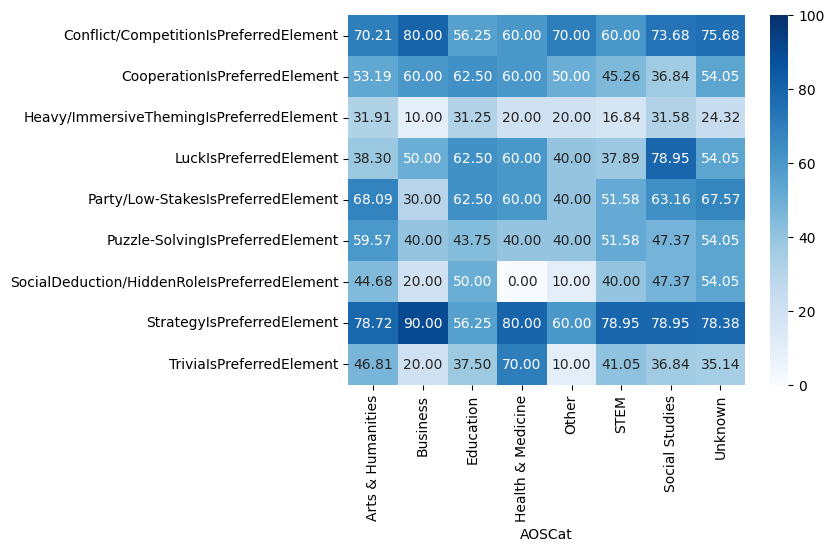

In [113]:
plot_heatmap_of_bool_features_percent(filter_threshold(cleaned_df, "AOSCat", 10),"AOSCat",["Conflict/CompetitionIsPreferredElement","CooperationIsPreferredElement","Heavy/ImmersiveThemingIsPreferredElement","LuckIsPreferredElement",
     "Party/Low-StakesIsPreferredElement","Puzzle-SolvingIsPreferredElement","SocialDeduction/HiddenRoleIsPreferredElement","SocialDeduction/HiddenRoleIsPreferredElement",
     "StrategyIsPreferredElement","TriviaIsPreferredElement"])

C:\Users\Seven\AppData\Local\Temp\ipykernel_20124\2767028291.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_pivot = df_melted.groupby([x,"Bool"]).sum().reset_index().pivot(index=x, columns="Bool", values="True")


FrequencyOfPlay
At Least Weekly          56
Several times a month    62
Monthly                  37
Every few months         54
Rarely/Seldom            30
Never                     5
Prefer not to say         0
Name: count, dtype: int64


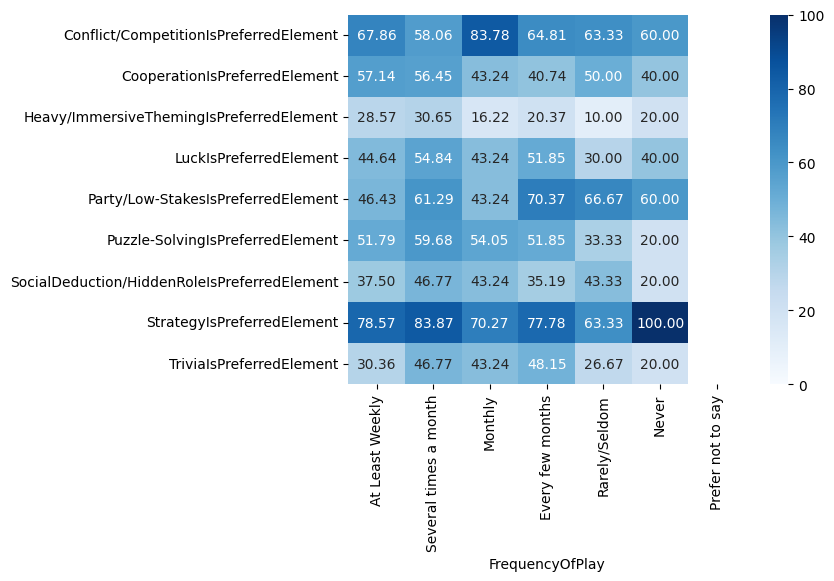

In [114]:
selected_rows = cleaned_df.copy()
selected_rows["FrequencyOfPlay"] = cleaned_df["FrequencyOfPlay"].apply(lambda x: "At Least Weekly" if x in ["Daily","Several times a week","Weekly"] else x)
selected_rows = filter_threshold(selected_rows,"AOSCat",10)

selected_rows["FrequencyOfPlay"] = pd.Categorical(selected_rows["FrequencyOfPlay"],
    categories=["At Least Weekly","Several times a month","Monthly","Every few months","Rarely/Seldom","Never","Prefer not to say"],ordered=True)

plot_heatmap_of_bool_features_percent(selected_rows,"FrequencyOfPlay",
    ["Conflict/CompetitionIsPreferredElement","CooperationIsPreferredElement","Heavy/ImmersiveThemingIsPreferredElement","LuckIsPreferredElement",
     "Party/Low-StakesIsPreferredElement","Puzzle-SolvingIsPreferredElement","SocialDeduction/HiddenRoleIsPreferredElement","SocialDeduction/HiddenRoleIsPreferredElement",
     "StrategyIsPreferredElement","TriviaIsPreferredElement"])

In [115]:
cleaned_df["Vision"].value_counts()

Vision
None                 132
Glasses               76
Both                  25
Contacts              10
Prefer not to say      1
Name: count, dtype: int64

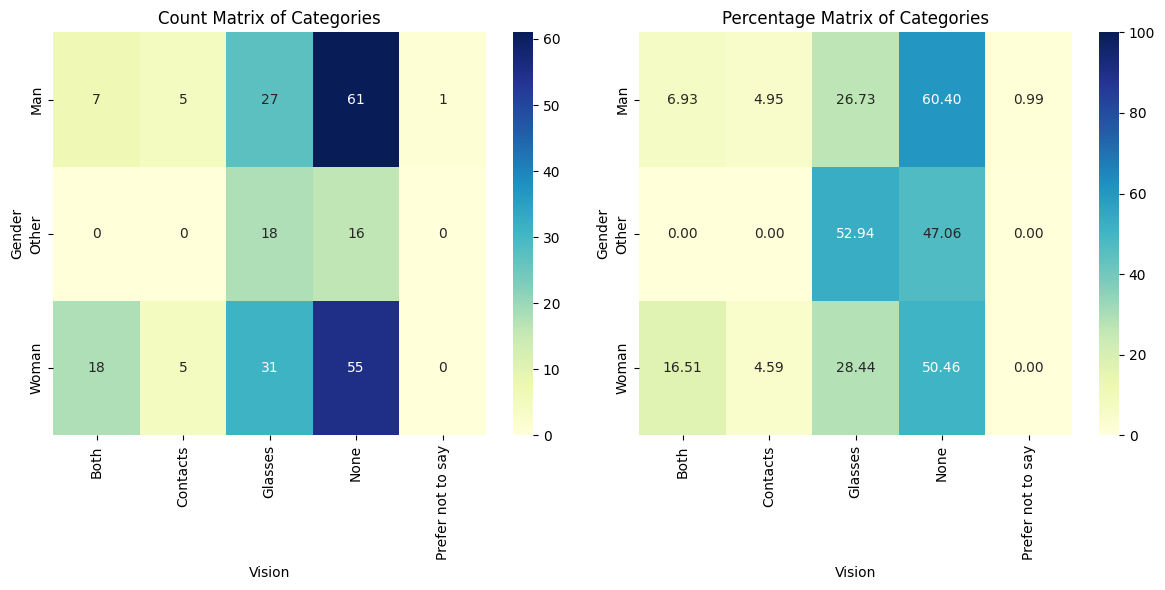

In [116]:
plot_count_and_percentage_heatmaps(genderForAnalysis_df["Gender"],genderForAnalysis_df["Vision"])

In [117]:
cleaned_df["FrequencyOfPlay"].value_counts()

FrequencyOfPlay
Several times a month    62
Every few months         54
Monthly                  37
Weekly                   30
Rarely/Seldom            30
Several times a week     19
Daily                     7
Never                     5
Prefer not to say         0
Name: count, dtype: int64

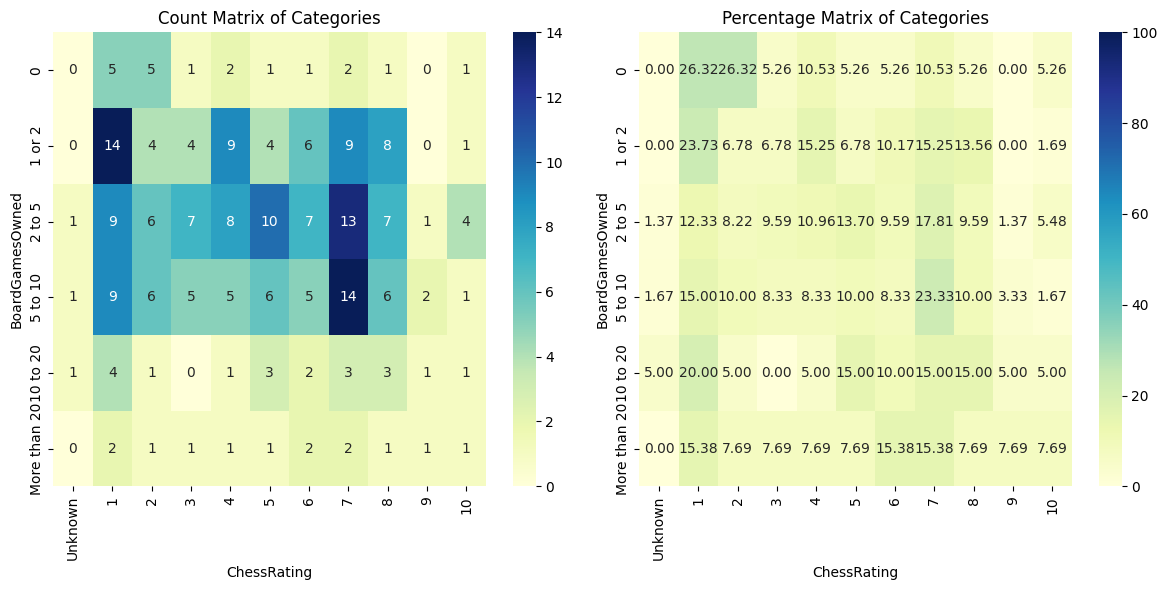

In [118]:
plot_count_and_percentage_heatmaps(cleaned_df["BoardGamesOwned"], cleaned_df["ChessRating"])

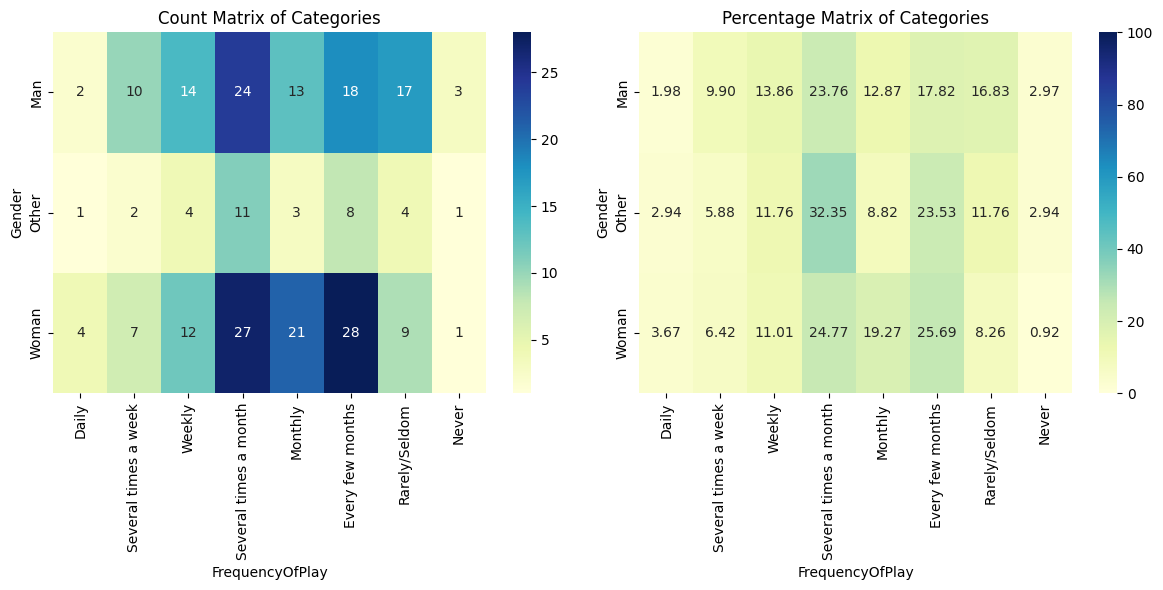

In [119]:
plot_count_and_percentage_heatmaps(genderForAnalysis_df["Gender"],genderForAnalysis_df["FrequencyOfPlay"])

<Axes: xlabel='FrequencyOfPlay', ylabel='Count'>

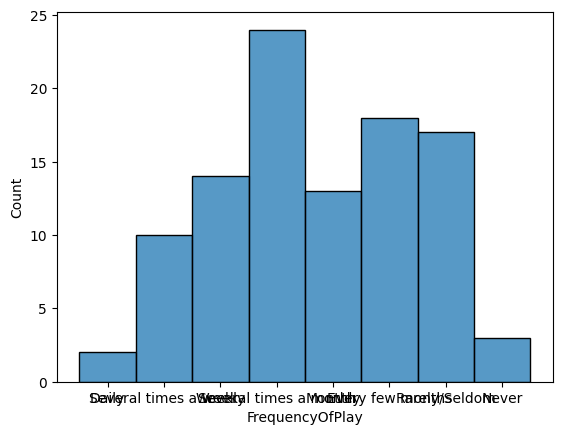

In [120]:
sns.histplot(genderForAnalysis_df[genderForAnalysis_df["Gender"] == "Man"],x="FrequencyOfPlay")

<Axes: xlabel='FrequencyOfPlay', ylabel='Count'>

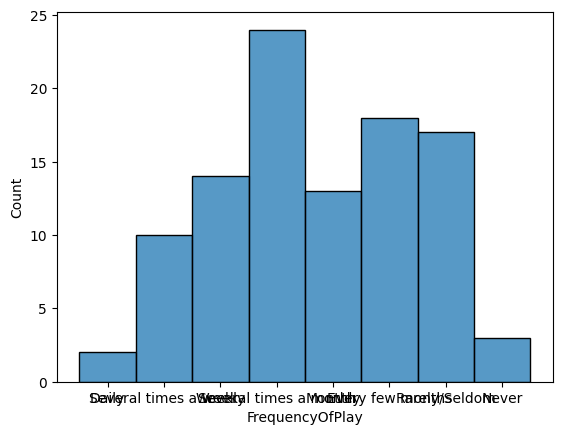

In [121]:
sns.histplot(genderForAnalysis_df[genderForAnalysis_df["Gender"] == "Man"],x="FrequencyOfPlay")

In [122]:
unique_preferred_elements

['',
 'Conflict/Competition',
 'Cooperation',
 'Heavy/Immersive Theming',
 'Luck',
 'Party/Low-Stakes',
 'Puzzle-Solving',
 'Social Deduction/Hidden Role',
 'Strategy',
 'Trivia']

Style
Casual                79
Other                 13
Party/Social          19
Situation-Specific    91
Strategic             42
Name: count, dtype: int64


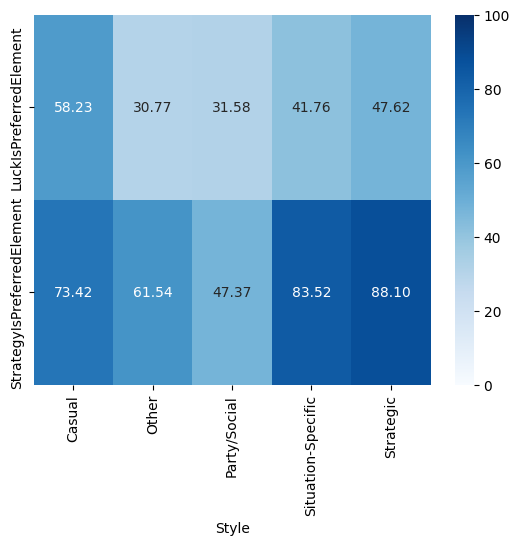

In [123]:
plot_heatmap_of_bool_features_percent(filter_threshold(cleaned_df,"Style",9),"Style",
            ["StrategyIsPreferredElement","LuckIsPreferredElement"])

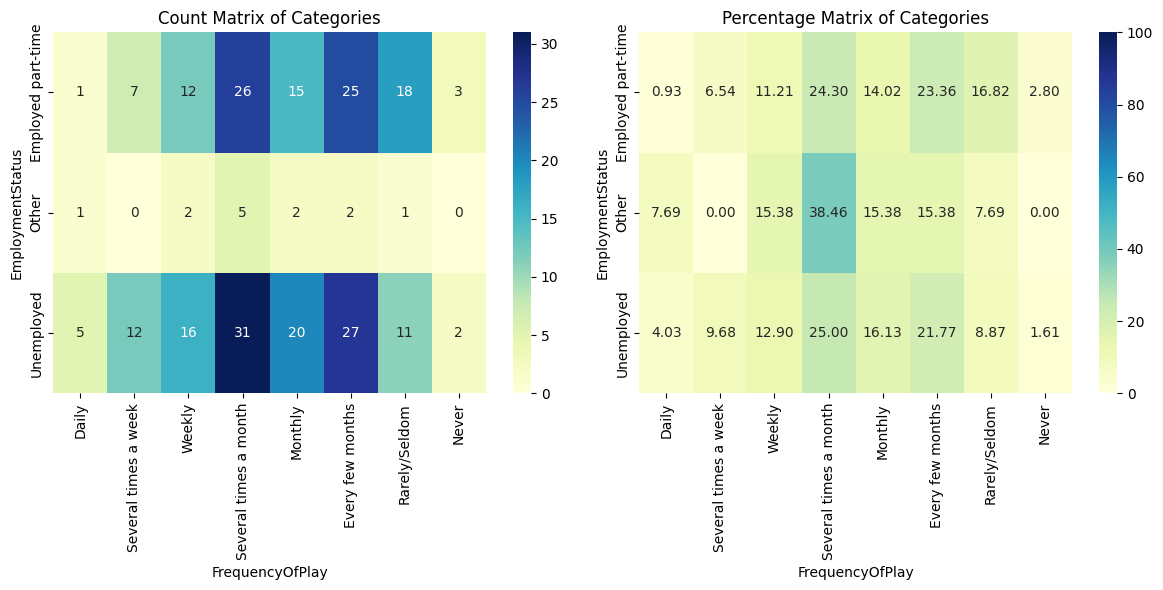

In [124]:
selected_rows = filter_threshold(cleaned_df,"EmploymentStatus",15)
plot_count_and_percentage_heatmaps(selected_rows["EmploymentStatus"],selected_rows["FrequencyOfPlay"])

In [125]:
selected_rows = filter_threshold(cleaned_df,"AOSCat",50)
selected_rows["AOSCat"].value_counts()

AOSCat
Other    149
STEM      95
Name: count, dtype: int64

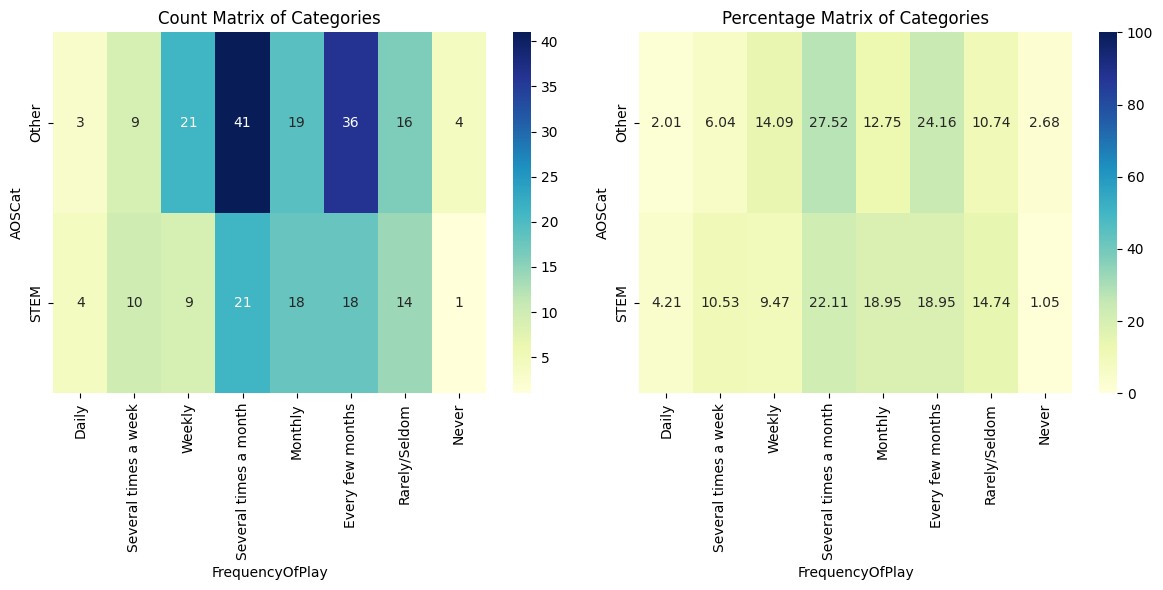

In [126]:
plot_count_and_percentage_heatmaps(selected_rows["AOSCat"],selected_rows["FrequencyOfPlay"])

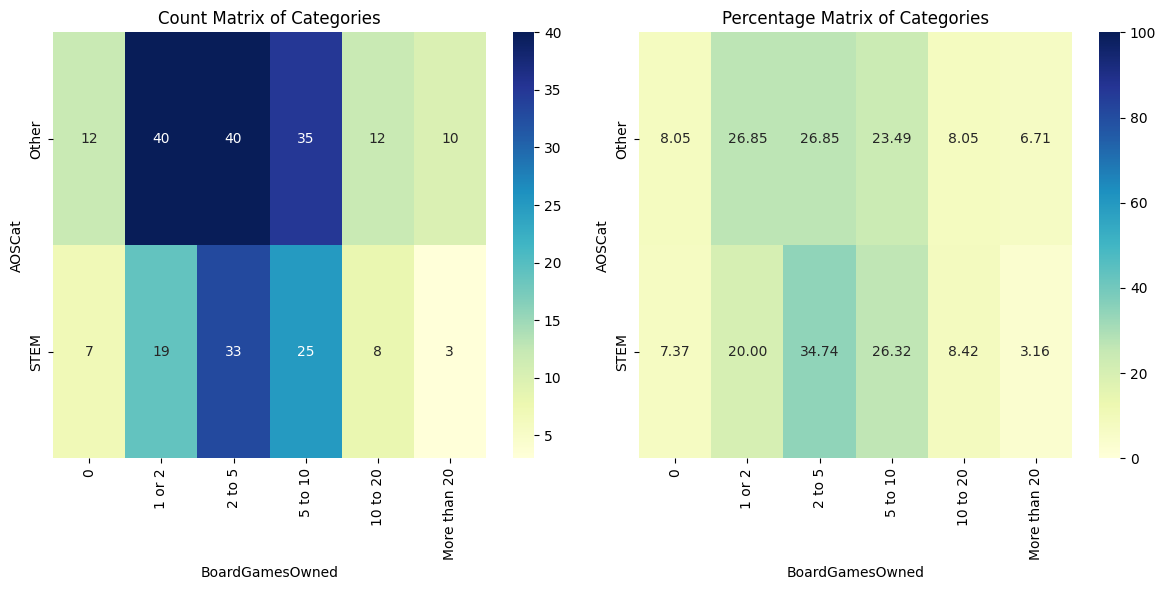

In [127]:
selected_rows = filter_threshold(cleaned_df,"AOSCat",50)
selected_rows["AOSCat"].value_counts()
plot_count_and_percentage_heatmaps(selected_rows["AOSCat"],selected_rows["BoardGamesOwned"])

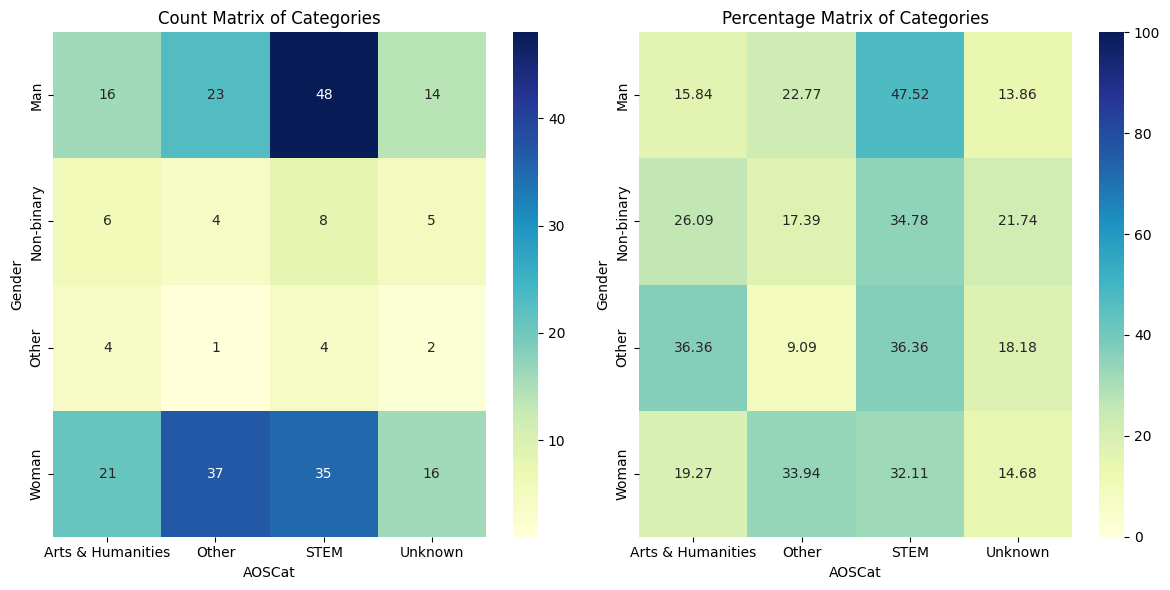

In [128]:
selected_rows = filter_threshold(cleaned_df,"Gender",15)
selected_rows = filter_threshold(selected_rows,"AOSCat",25)
plot_count_and_percentage_heatmaps(selected_rows["Gender"],selected_rows["AOSCat"])

### Machine Learning

#### First Attempt at Building a Machine Learning Model

In [145]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# load dataset
data = cleaned_df.copy()
data = data[["Gender","BoardGamesOwned","FrequencyOfPlay","Style","ChessRating",
     
     "Party/Low-StakesIsPreferredElement","SocialDeduction/HiddenRoleIsPreferredElement","TriviaIsPreferredElement",

     "AnimalsIsEnjoyedGenre","CardIsEnjoyedGenre","FantasyIsEnjoyedGenre","HorrorIsEnjoyedGenre","LuckIsEnjoyedGenre",
     "PuzzleIsEnjoyedGenre","Role-PlayingIsEnjoyedGenre","RollandMoveIsEnjoyedGenre","ScienceFictionIsEnjoyedGenre",
     "SocialDeduction/HiddenRoleIsEnjoyedGenre","SportsIsEnjoyedGenre","TriviaIsEnjoyedGenre","WarIsEnjoyedGenre",
     "WorldWarIIIsEnjoyedGenre","ZombiesIsEnjoyedGenre"]]

# data = data.drop(columns=["WWUStatus","EmploymentStatus","Vision","Religiosity","AOS","EnjoysBoardGames",
#                           "EnjoyedBoardGames"])



data = filter_threshold(data,"Gender",20)
data = data[data["Gender"] != "Other"]
# data = filter_threshold(data,"AOSCat",15)
data = filter_threshold(data,"Style",15)


In [152]:
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier



X, y = data.drop(columns=["Gender"]), data["Gender"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, stratify=y, random_state=40)


onehot_and_ordinal_transform = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(), ["Style"]),
        ("ordinal", make_pipeline(OrdinalEncoder(categories=[["Prefer not to say", "0", "1 or 2", "2 to 5", "5 to 10", "10 to 20", "More than 20"],
                                               ["Daily", "Several times a week", "Weekly", "Several times a month", "Monthly", "Every few months", "Rarely/Seldom", "Never", "Prefer not to say"],
                                               ["Unknown", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]]),StandardScaler()),
                                                
                                               ["BoardGamesOwned",
                                                "FrequencyOfPlay",
                                                "ChessRating"])                         
    ], remainder="passthrough"
)


logistic_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    LogisticRegression(max_iter=10000)
)

k_neighbors_classifier_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    KNeighborsClassifier()
)

decision_tree_classifier_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    DecisionTreeClassifier()
)

random_forest_classifier_pipe = make_pipeline(
    onehot_and_ordinal_transform,
    RandomForestClassifier(random_state=40)
)

dummy_classifier = DummyClassifier(strategy='most_frequent')


current_pipe = logistic_pipe

print(f"Model Cross Val Scores: {cross_val_score(current_pipe,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")
print(f"Dummy Cross Val Scores: {cross_val_score(dummy_classifier,X_train,y_train,cv=4,scoring=make_scorer(accuracy_score))}")

Model Cross Val Scores: [0.51724138 0.62068966 0.72413793 0.72413793]
Dummy Cross Val Scores: [0.48275862 0.48275862 0.44827586 0.44827586]


In [153]:
# Should be used when certain model performs well

current_pipe.fit(X_train,y_train)
conf_matrix = confusion_matrix(y_test, current_pipe.predict(X_test),labels=["Man","Woman","Other"])

print(conf_matrix)

print(f"Model Accuracy Score: {accuracy_score(current_pipe.predict(X_test),y_test)}")



dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)

print(f"Dummy Accuracy Score: {accuracy_score(y_test, y_pred)}")

[[31 19  0]
 [16 37  0]
 [ 0  0  0]]
Model Accuracy Score: 0.5811965811965812
Dummy Accuracy Score: 0.4700854700854701
